<a href="https://colab.research.google.com/github/dustinhodges/DS-Unit-1-Sprint-2-Statistics/blob/master/Dustin_Hodges_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:



### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?




In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  return (prob_drunk_prior / 
          ((prob_drunk_prior) + (false_positive_rate) * (1 - prob_drunk_prior)))

In [14]:
prob_drunk_given_positive(0.001, 0.08)

0.012357884330202669

we see a 1.24% probability that a positive means someone is drunk.

In [13]:
prob_drunk_given_positive(0.012357884330202669, 0.08)

0.13525210993291495

we see 13.53% prob that a second positive means someone is drunk.

In [8]:
prob_drunk_given_positive(0.13525210993291495, 0.08)

0.6615996951348605

In [9]:
prob_drunk_given_positive(0.6615996951348605, 0.08)

0.9606895076105054

only after four positives do have 96% confidence in the subject's legal drunkenness.

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)



In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-09 22:46:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-09 22:46:15 (319 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [39]:
import pandas as pd

df = pd.read_csv('house-votes-84.data',
                header=None,
                names=['party', 'handicapped-infants', 'water-project',
                      'budget', 'physician-fee-freeze', 'el-salvador-aid', 
                      'religious-groups', 'anti-satellite-ban', 
                      'aid-to-contras', 'mx-missile', 'immigration', 
                      'synfuels', 'education', 'right-to-sue', 'crime', 
                      'duty-free', 'south-africa'])

import numpy as np

df = df.replace({'?':0.5, 'n':0, 'y':1})
df.head()

print(df.shape)
df.head()


(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [40]:
rep = df[df.party == "republican"]
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.0,0.0


In [41]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.193452,0.505952,0.142857,0.979167,0.943452,0.892857,0.25000,0.175595,0.122024,0.556548,0.151786,0.842262,0.839286,0.961310,0.119048,0.636905
std,0.390476,0.470660,0.342336,0.126611,0.221762,0.305356,0.42384,0.359390,0.321379,0.493750,0.340653,0.337922,0.347452,0.164126,0.295870,0.446887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.50000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


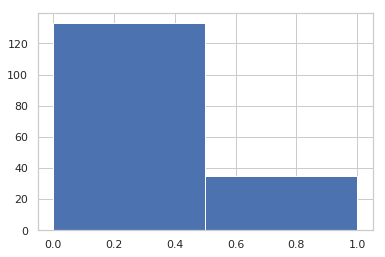

In [42]:
rep['aid-to-contras'].hist(bins=2);

In [65]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

frequentist_confidence_interval = confidence_interval(rep['aid-to-contras'])
frequentist_confidence_interval

(0.17559523809523808, 0.12085352884507394, 0.23033694734540222)

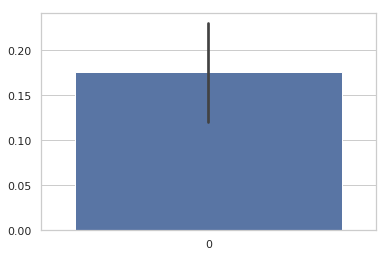

In [73]:
import seaborn as sns
sns.set(style="whitegrid")
contras = frequentist_confidence_interval
ax = sns.barplot(data=contras)

In [81]:
bayes_confidence_interval = stats.bayes_mvs(rep['aid-to-contras'], alpha=0.95)
bayes_confidence_interval

(Mean(statistic=0.17559523809523808, minmax=(0.12085352884507394, 0.23033694734540222)),
 Variance(statistic=0.13072691197691194, minmax=(0.10538641607846187, 0.16204529222269143)),
 Std_dev(statistic=0.3610143651527736, minmax=(0.32463274030581374, 0.4025484967338612)))

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).


It feels like Bayesian statistics manages to look at the probability of an occurance from two different directions simultaneously. A straightforward probability then a second counterfactual sort of direction. Depending on the example this could be the probability of a grand prize behind a door (1/3), which we could call the "contestant view" then the probability viewed negatively(the door Monty Hall DOESNT choose), we could call this "Monty's view". This double perspective is why it feels like magic, counterintuition to our usual monocular assumptions. According to the drunk test example, this takes the form of incorporating both the false positive rate and the false negative rate, AND the starting assumption about the relative number of drunk drivers on the road. Again two opposing viewpoints that give a "rounder" picture than typical frequentist models that work with populations and samples of that population. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!